In [13]:
from init import *
from rootIO import *

In [14]:
_files_dir = '/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/'
_filename = '*_Decay0_Xe124_'
_decayname = '0nukk'
_suffix = '.root'

_file = _files_dir + _filename + _decayname + _suffix

branches= ['eventid','ed', 'xp', 'yp', 'zp', 'type', 'trackid', 'time', 'parentid','etot']

df = g4root_to_df(_file,branches,1)


/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/*_Decay0_Xe124_0nukk.root



In [15]:
df.head()

,eventid,ed,xp,yp,zp,type,trackid,time,parentid,etot
entry,,,,,,,,,,
0,0,"[0.98947, 4.7747, 86.64599, 92.45376, 0.0, 103...","[54.213753, 51.51388, 51.5026, 51.499546, 51.4...","[-96.5914, -97.8146, -97.827774, -97.83386, -9...","[-72.28212, -72.73715, -72.75388, -72.758705, ...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[6, 6, 8, 8, 8, 7, 7, 7, 7, 7, 9, 5, 4, 4, 4, ...","[8.961231e-11, 9.96151e-11, 9.9734714e-11, 9.9...","[0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, ...",9361.942383
1,1,"[0.06984, 0.0, 89.91214, 91.63193, 32.401287, ...","[77.86749, 43.199886, 77.88308, 77.88079, 77.8...","[162.60342, 119.57253, 162.57985, 162.58969, 1...","[-246.40016, -300.0, -246.38557, -246.3767, -2...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[6, 6, 7, 7, 7, 7, 5, 4, 4, 3, 2, 2, 1, 14, 14...","[2.3249502e-10, 4.89284e-10, 2.3264463e-10, 2....","[0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",8973.224609
2,2,"[0.01096, 4.7747, 82.335396, 84.14929, 125.870...","[-125.84367, -112.00575, -111.95881, -111.9465...","[9.083109, 15.907622, 15.967271, 16.008968, 16...","[40.868763, 47.78672, 47.818733, 47.779438, 47...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[6, 6, 8, 8, 8, 8, 8, 7, 7, 7, 9, 9, 5, 4, 3, ...","[4.730452e-11, 1.0370746e-10, 1.0403935e-10, 1...","[0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, ...",9361.932617
3,3,"[0.06984, 5.1039, 114.17728, 43.167915, 0.0, 8...","[-157.63937, -157.35503, -157.3664, -157.366, ...","[-99.664764, -99.66359, -99.66735, -99.66888, ...","[226.25648, 224.7969, 224.78131, 224.78317, 22...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[6, 6, 8, 8, 8, 7, 7, 7, 7, 7, 7, 5, 4, 4, 4, ...","[3.716464e-10, 3.7660663e-10, 3.7670836e-10, 3...","[0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, ...",9361.933594
4,4,"[4.7747, 0.01096, 4.7747, 0.69091, 0.0, 4.7747...","[-493.3774, -525.13715, -525.9396, -525.76355,...","[-215.29431, -201.38448, -199.94518, -202.5556...","[187.87273, 206.95332, 209.32587, 208.57843, 2...","[b'gamma', b'gamma', b'gamma', b'gamma', b'gam...","[6, 6, 6, 6, 6, 6, 11, 11, 10, 10, 9, 9, 9, 8,...","[3.6554534e-11, 1.6856479e-10, 1.7820034e-10, ...","[0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",8850.937500


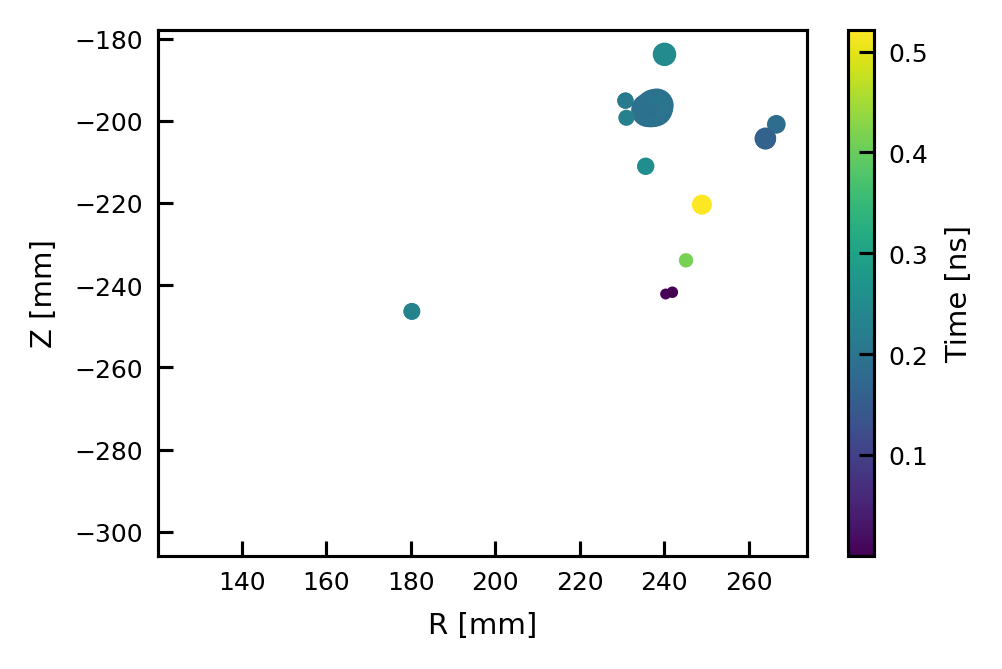

In [16]:
eventid=1

plt.scatter((np.sqrt(df.xp[eventid]**2+df.yp[eventid]**2)), df.zp[eventid], c=df.time[eventid]*1e9, s=df.ed[eventid]/10)
plt.colorbar(label='Time [ns]')
plt.xlabel('R [mm]')
plt.ylabel('Z [mm]')
plt.draw()
plt.show()

In [17]:
esum_late=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] > 0.02e-9:
        esum_late+=pair[1]
        
print(esum_late)

esum_early=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] < 0.02e-9:
        esum_early+=pair[1]
        
print(esum_early)

print(esum_early+esum_late)

8906.494924711064
66.72997134923935
8973.224896060303


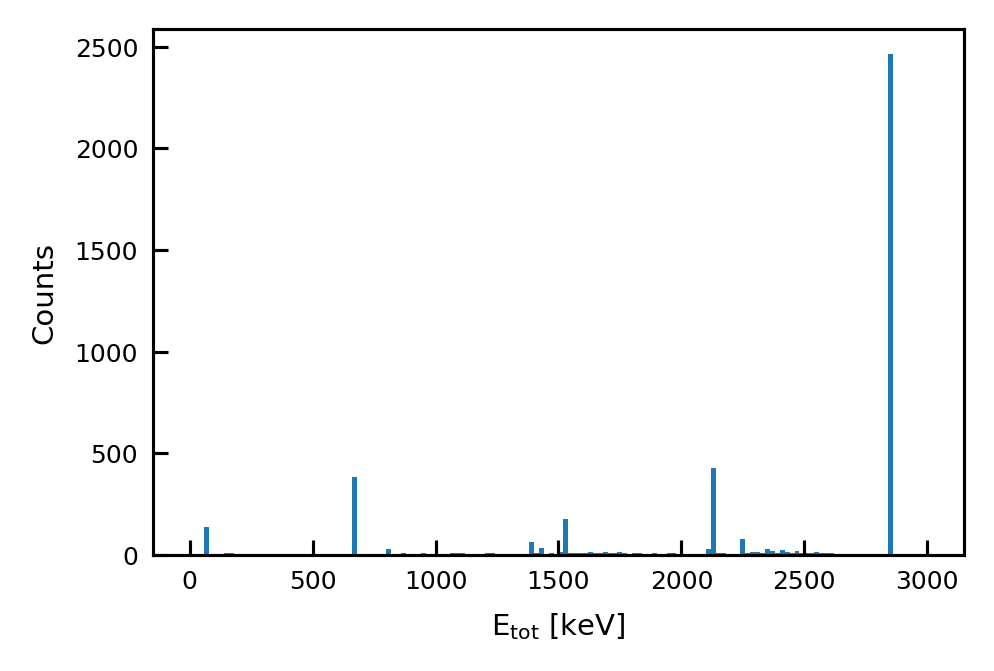

In [18]:
plt.hist(df.etot,range=(0,3000),bins=150)
plt.xlabel('E$_{\\rm{tot}}$ [keV]')
plt.ylabel('Counts')
plt.draw()
plt.savefig(_decayname+'_etot.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [19]:
for pair in zip(df.trackid[eventid], df.type[eventid], df.parentid[eventid]):
    print(pair)

(6, b'gamma', 0)
(6, b'gamma', 0)
(7, b'e-', 6)
(7, b'e-', 6)
(7, b'e-', 6)
(7, b'e-', 6)
(5, b'gamma', 0)
(4, b'gamma', 0)
(4, b'gamma', 0)
(3, b'gamma', 0)
(2, b'gamma', 0)
(2, b'gamma', 0)
(1, b'gamma', 0)
(14, b'e-', 1)
(14, b'e-', 1)
(13, b'e-', 2)
(13, b'e-', 2)
(12, b'e-', 3)
(12, b'e-', 3)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(11, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(8, b'e-', 5)
(18, b'gamma', 8)
(20, b'gamma', 18)
(20, b'gamma', 18)
(17, b'gamma', 8)
(17, b'gamma', 8)
(24, b'gamma', 17)
(16, b'gamma', 10)
(27, b'gamma', 16)
(15, b'gamma', 11)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)
(9, b'e+', 5)